In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from numpy import polyval, polyfit

In [30]:
f = h5py.File('/reg/d/psdm/cxi/cxilr6716/results/flatfield_calibration/ave_int_statisitcs/run76_ave_int.h5','r')
f.keys()

IOError: Unable to open file (Unable to open file: name = '/reg/d/psdm/cxi/cxilr6716/results/flatfield_calibration/ave_int_statisitcs/run76_ave_int.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [27]:
num_shots=f['num_shots_per_bin'].value
flat_ave_shots = f['ave_flat_shots'].value
ave_bin_int = f['bin_centers'].value
flat_std_shots = f['ave_flat_shots_err'].value

In [28]:
select = num_shots>10
flat_ave_shots[select].shape

(2, 2227316)

In [29]:
 f['ave_flat_shots']

<HDF5 dataset "ave_flat_shots": shape (3, 2227316), type "<f8">

(25, 2227316)


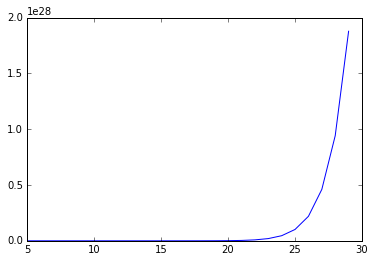

In [67]:
degree = 20
ave_bin_int = np.arange(5,30,1)
flat_ave_shots = np.random.rand( ave_bin_int.size, f['ave_flat_shots'].shape[-1] )\
+ polyval(np.random.rand(degree+2), ave_bin_int)[:,None]
flat_std_shots = f['ave_flat_shots_err'].value
plt.plot(ave_bin_int,polyval(np.random.rand(degree+1), ave_bin_int))
print flat_ave_shots.shape

In [77]:
#fit to poly
# fit to polynomial
degree = 10
start=0
end=100000
poly_coefs = np.zeros( (end-start,degree+1) )

for idx,ii in enumerate(range(start,end)):
    y = flat_ave_shots[:,ii]
    cc = polyfit(ave_bin_int, y, degree)
    poly_coefs[idx] = cc

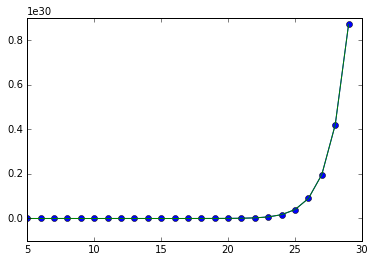

In [80]:
x = 89854
# plt.errorbar(ave_bin_int, flat_ave_shots[:,x+start],yerr=flat_std_shots[:,x+start], marker='o')
plt.plot(ave_bin_int, flat_ave_shots[:,x+start], marker='o')
plt.plot(ave_bin_int, polyval(poly_coefs[x],ave_bin_int) )

In [2]:
run=115
f1 = h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/flatfield_calibration/flat_det_imgs/fullImgs_run%d.h5'%run,'r')
f1.keys()
total_int = f1['ave_tot_int'].value
total_int.shape

(1996,)

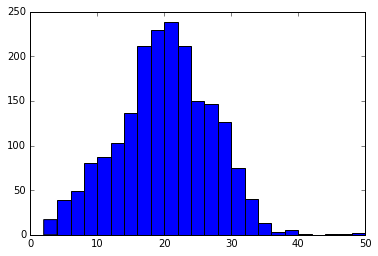

In [10]:
delta=2.0
bins = np.arange(2,total_int.max()+1,delta)

hist=plt.hist(f1['ave_tot_int'].value,bins=bins)
# plt.xlim(0,20)

In [12]:
bins.size

25

In [132]:
label=np.digitize(f1['ave_tot_int'].value,bins)

In [147]:
f1['ave_tot_int'].value[label==121].mean(),bins[120]+delta/2.

(60.238205, 60.25)

In [85]:
num_pix = flat_ave_shots = f['ave_flat_shots'].shape[-1]
nfiles = 10
evt_list = np.array_split(np.arange( num_pix), nfiles )

In [89]:
evt_list[0].min(), evt_list[0].max()

(0, 222731)

In [91]:
evt_list[4]

array([ 890928,  890929,  890930, ..., 1113657, 1113658, 1113659])

In [148]:
co

NameError: name 'coefs' is not defined

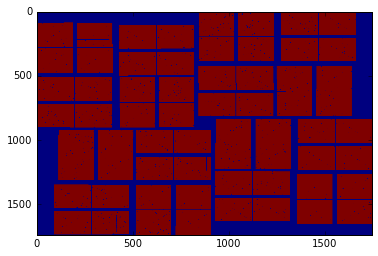

In [34]:
f_mask = h5py.File('/reg/d/psdm/cxi/cxilr6716/results/masks/run76_masks.h5','r')
mask=f_mask['mask'].value
plt.imshow(mask,aspect='auto')